Topic:        Challenge Set 6

Subject:      Linear Learning

Date:         1/29/2018

Name:         Browning Gentry

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Challenge 1

In [252]:
X = (np.linspace(1, 100, 100)).reshape(100,1)
y = 1 + 2*np.log(np.linspace(1, 100, 100)) + np.random.normal(scale=0.3, size=100)

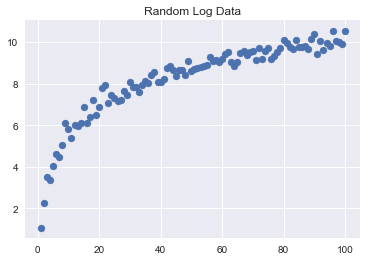

In [253]:
plt.scatter(X,y)
plt.title('Random Log Data');

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

poly = PolynomialFeatures(2)
X_2_train = poly.fit_transform(X_train)
X_2_test = poly.fit_transform(X_test) 

X_log_train = np.log(X_train)
X_log_test = np.log(X_test)

expm = LinearRegression()
logm = LinearRegression()
expfit = expm.fit(X_2_train,y_train)

logfit = logm.fit(X_log_train,y_train)

print('Exponential Fit: ' + str(expfit.score(X_2_test,y_test)))

print('Log Fit: ' + str(logfit.score(X_log_test,y_test)))

Exponential Fit: 0.86176454707
Log Fit: 0.969986534539


# Challenge 2

In [110]:
X = (np.linspace(0, 1, 100)).reshape(100,1)
y = 1 + 2*np.linspace(0, 1, 100) + 3*np.linspace(0, 1, 100)**2 + np.random.normal(scale=.3, size=100)

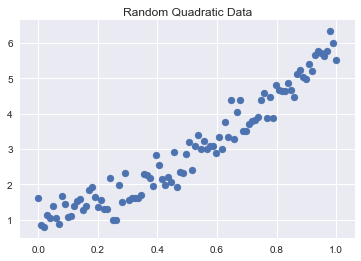

In [249]:
plt.scatter(X,y)
plt.title('Random Quadratic Data');

In [113]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

mdl = LinearRegression()
mdl_fit = mdl.fit(X_train, y_train)

print('Training Set MSE: ' + str(mean_squared_error(y_train, mdl_fit.predict(X_train))))
print('Test Set MSE: ' + str(mean_squared_error(y_test, mdl_fit.predict(X_test))))


Training Set MSE: 0.195717033383
Test Set MSE: 0.130924393784


# Challenge 3

In [225]:
# calculate AIC
# I can't seem to get this calc correct
# maybe there's something built in sklearn for this? - I can't find it
def AIC_calc(y_true, y_pred, num_features):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler((.5,.6)).fit(y_true)
    y_true = scaler.transform(y_true)
    y_pred = scaler.transform(y_pred)
    ll_elements = y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred)
    ll = -np.sum(scaler.inverse_transform(ll_elements))
    AIC = 2*num_features - 2*np.log(ll)
    return AIC

In [227]:
import warnings
warnings.filterwarnings("ignore")

In [246]:
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Train_MSE = []
Test_MSE = []
Test_R2 = []
Test_AIC = []

for i in range(8):
    poly = PolynomialFeatures(i)
    poly_trans = poly.fit(X_train)
    X_train_poly = poly_trans.transform(X_train)
    X_test_poly = poly_trans.transform(X_test)
    
    mdl = LinearRegression()
    mdl_fit = mdl.fit(X_train_poly, y_train)
    
    Train_MSE.append(mean_squared_error(y_train, mdl_fit.predict(X_train_poly)))
    Test_MSE.append(mean_squared_error(y_test, mdl_fit.predict(X_test_poly)))
    Test_R2.append(r2_score(y_test, mdl_fit.predict(X_test_poly)))
    Test_AIC.append(AIC_calc(y_test, mdl_fit.predict(X_test_poly), i))   

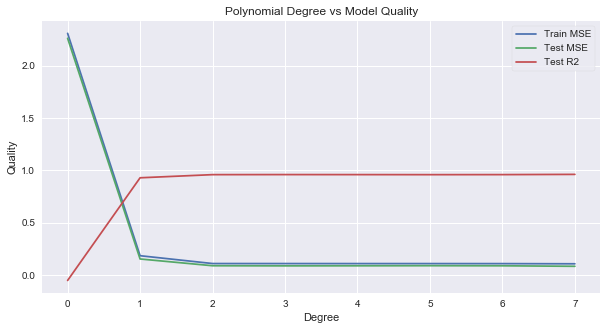

In [254]:
degree = [i for i in range(8)]
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.plot(degree, Train_MSE, label = 'Train MSE')
ax.plot(degree, Test_MSE, label = 'Test MSE')
ax.plot(degree, Test_R2, label = 'Test R2')
#ax.plot(degree, Test_AIC, label = 'Test AIC')
plt.title('Polynomial Degree vs Model Quality')
plt.ylabel('Quality')
plt.xlabel('Degree')
plt.legend(frameon = 'True');

# Challenge 4

In [238]:
Train_MSE = []
Test_MSE = []
Train_Size = []

for train_size in range(5,96,5):
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    Train_Size.append(train_size)

    mdl = LinearRegression()
    mdl_fit = mdl.fit(X_train, y_train)
    
    Train_MSE.append(mean_squared_error(y_train, mdl_fit.predict(X_train)))
    Test_MSE.append(mean_squared_error(y_test, mdl_fit.predict(X_test)))
    

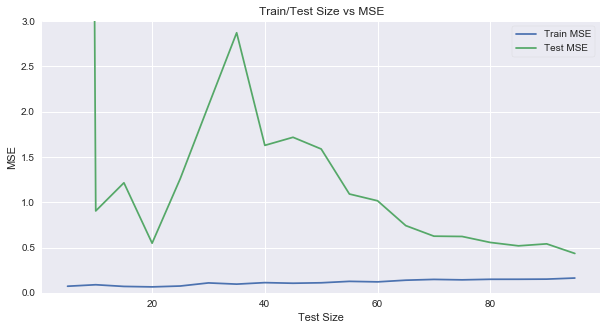

In [244]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.plot(Train_Size, Train_MSE, label = 'Train MSE')
ax.plot(Train_Size, Test_MSE, label = 'Test MSE')
plt.ylim([0,3])
plt.title('Train/Test Size vs MSE')
plt.ylabel('MSE')
plt.xlabel('Test Size')
plt.legend(frameon = 'True');